In [1]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor  
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler #normalization

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# 1 Loading the data


In [4]:
# Load data

raw_data= pd.read_csv('//Users/stephenadjei/Desktop/KNUST/2_Postgraduate/2_Masters_Sem_2/2_PE_564_ML/4_ML_Practice/1_LRexample/CS_2.csv')

# save the work in a folder with the data and use the dataname.csv


raw_data.head()   #runs the first 5 rows

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
#here I am changing the column names

# Not an important step

raw_data.columns=['Cement','BFS','FA','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate',
              'Age','Strength']

raw_data    #showing the data

,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [6]:
raw_data.tail() # checking see my last 5 rows

,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


# Data Processing  

# 1- Exploratory Data Analysis: null,

In [7]:
print(raw_data.shape)  # rows= observations, columns= characteristics

(1030, 9)


In [8]:
#extract information from the data
raw_data.info() #provides data on data type, null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BFS               1030 non-null   float64
 2   FA                1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse Aggregate  1030 non-null   float64
 6   Fine Aggregate    1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
# Checking for null values

#The function dataname.isnull().sum()returns the number of missing values in the data set.
raw_data.isnull().sum()     #.sum() summarizes by column

Cement              0
BFS                 0
FA                  0
Water               0
Superplasticizer    0
Coarse Aggregate    0
Fine Aggregate      0
Age                 0
Strength            0
dtype: int64

In [10]:
# 2 Method
raw_data.isna()


#It shows True only when the missing value is NaN type. 

,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [11]:
raw_data.describe()   # data statistics- transposing (T) it makes it more clearer

#if the mean is very far from the max, it means the max is an outlier

,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Code to send the statistics table straight into word document. It saves automatically in the same folder

In [ ]:
from docx import Document  

In [ ]:
summary = df.describe()

# Create a Word document
doc = Document()

# Add a table with the number of rows and columns needed
table = doc.add_table(rows=1, cols=len(summary.columns) + 1)
table.style = 'Table Grid'

In [ ]:
# Add header row
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Statistic'
for i, col_name in enumerate(summary.columns):
    hdr_cells[i + 1].text = col_name

# Add data rows
for row in summary.itertuples():
    row_cells = table.add_row().cells
    row_cells[0].text = str(row.Index)
    for i, val in enumerate(row[1:]):
        row_cells[i + 1].text = f'{val:.2f}'  # Formatting the numbers to 2 decimal places

# Save the document #appears in same folder as the python file automatically
doc.save('summary_statistics.docx')

print("Word document 'summary_statistics.docx' created successfully.")



# Ways of dealing with missing data -Nan



In [14]:

# 1 Drop  rows  and columns having Nan

#a
new_data=raw_data.dropna() #all rows with Nan

#b dropna(thresh = minimum_value): drop rows based on a threshold. 
#This strategy sets a minimum number of missing values required to preserve the rows. 
      #dropna(thresh = 0.6)  with atleast 60% non null
    

#c dropna(axis = 1) - drops columns with NaN



#new_data = raw_data.dropna(axis=1)  #drops column

new_data

,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# I didnt run the codes below

In [ ]:
# 2 fillna() - fill missing (NaN) values in a DataFrame with the mean of each column

#for simple computation

#new_data=data.fillna(df.mean(), inplace=True)

data.fillna(data.mean(), inplace=True)


#The use of inplace=True ensures that the changes are made directly to the data DataFrame, 
#without creating a new DataFrame.

#If you don't use inplace=True, you can assign the result to a new DataFrame or back to the original DataFrame

new_data = data.fillna(data.mean())


#for specific column

mean_value = data['column name'].mean()

# Fill NaNs in column 'A' with the calculated mean
data['column name'] = data['column name'].fillna(mean_value)


In [ ]:
# 3 Mean/median inputation of the respective columns
# for sophiticated computation

#SimpleImputer to handle missing values in a DataFrame by replacing them with the mean (or median) of each column

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') #creates the simple inputer (it could me meadian)

new_data = imputer.fit_transform(data)   #fits the imputer on the data (calculates the mean or median for each column)
#and then transforms the data by replacing the missing values.


# for specific column

imputer = SimpleImputer(strategy='mean')

column_data = data[['column name']]

imputed_column = imputer.fit_transform(column_data)

# Replace the original column with the imputed data
data['column'] = imputed_column



In [ ]:
#4 Interpolation (recommended)

#This can often provide a more accurate
#and contextually relevant imputation compared to using a simple mean or median. 

1. Interpolate Nan

#data['column name']= data['column name'].interpolate()

2. Replace zeros with NaNs and then use interpolation to fill NaNs:
    
#data['column name']= #data['column name'].replace(0,np.nan)
#data['column name']= data['column name'].interpolate()  #interpolate to fill nans

In [15]:
# Cofirmn the NULL observations after dropping/replacing

new_data.isnull().sum() 

Cement              0
BFS                 0
FA                  0
Water               0
Superplasticizer    0
Coarse Aggregate    0
Fine Aggregate      0
Age                 0
Strength            0
dtype: int64

# Visualization

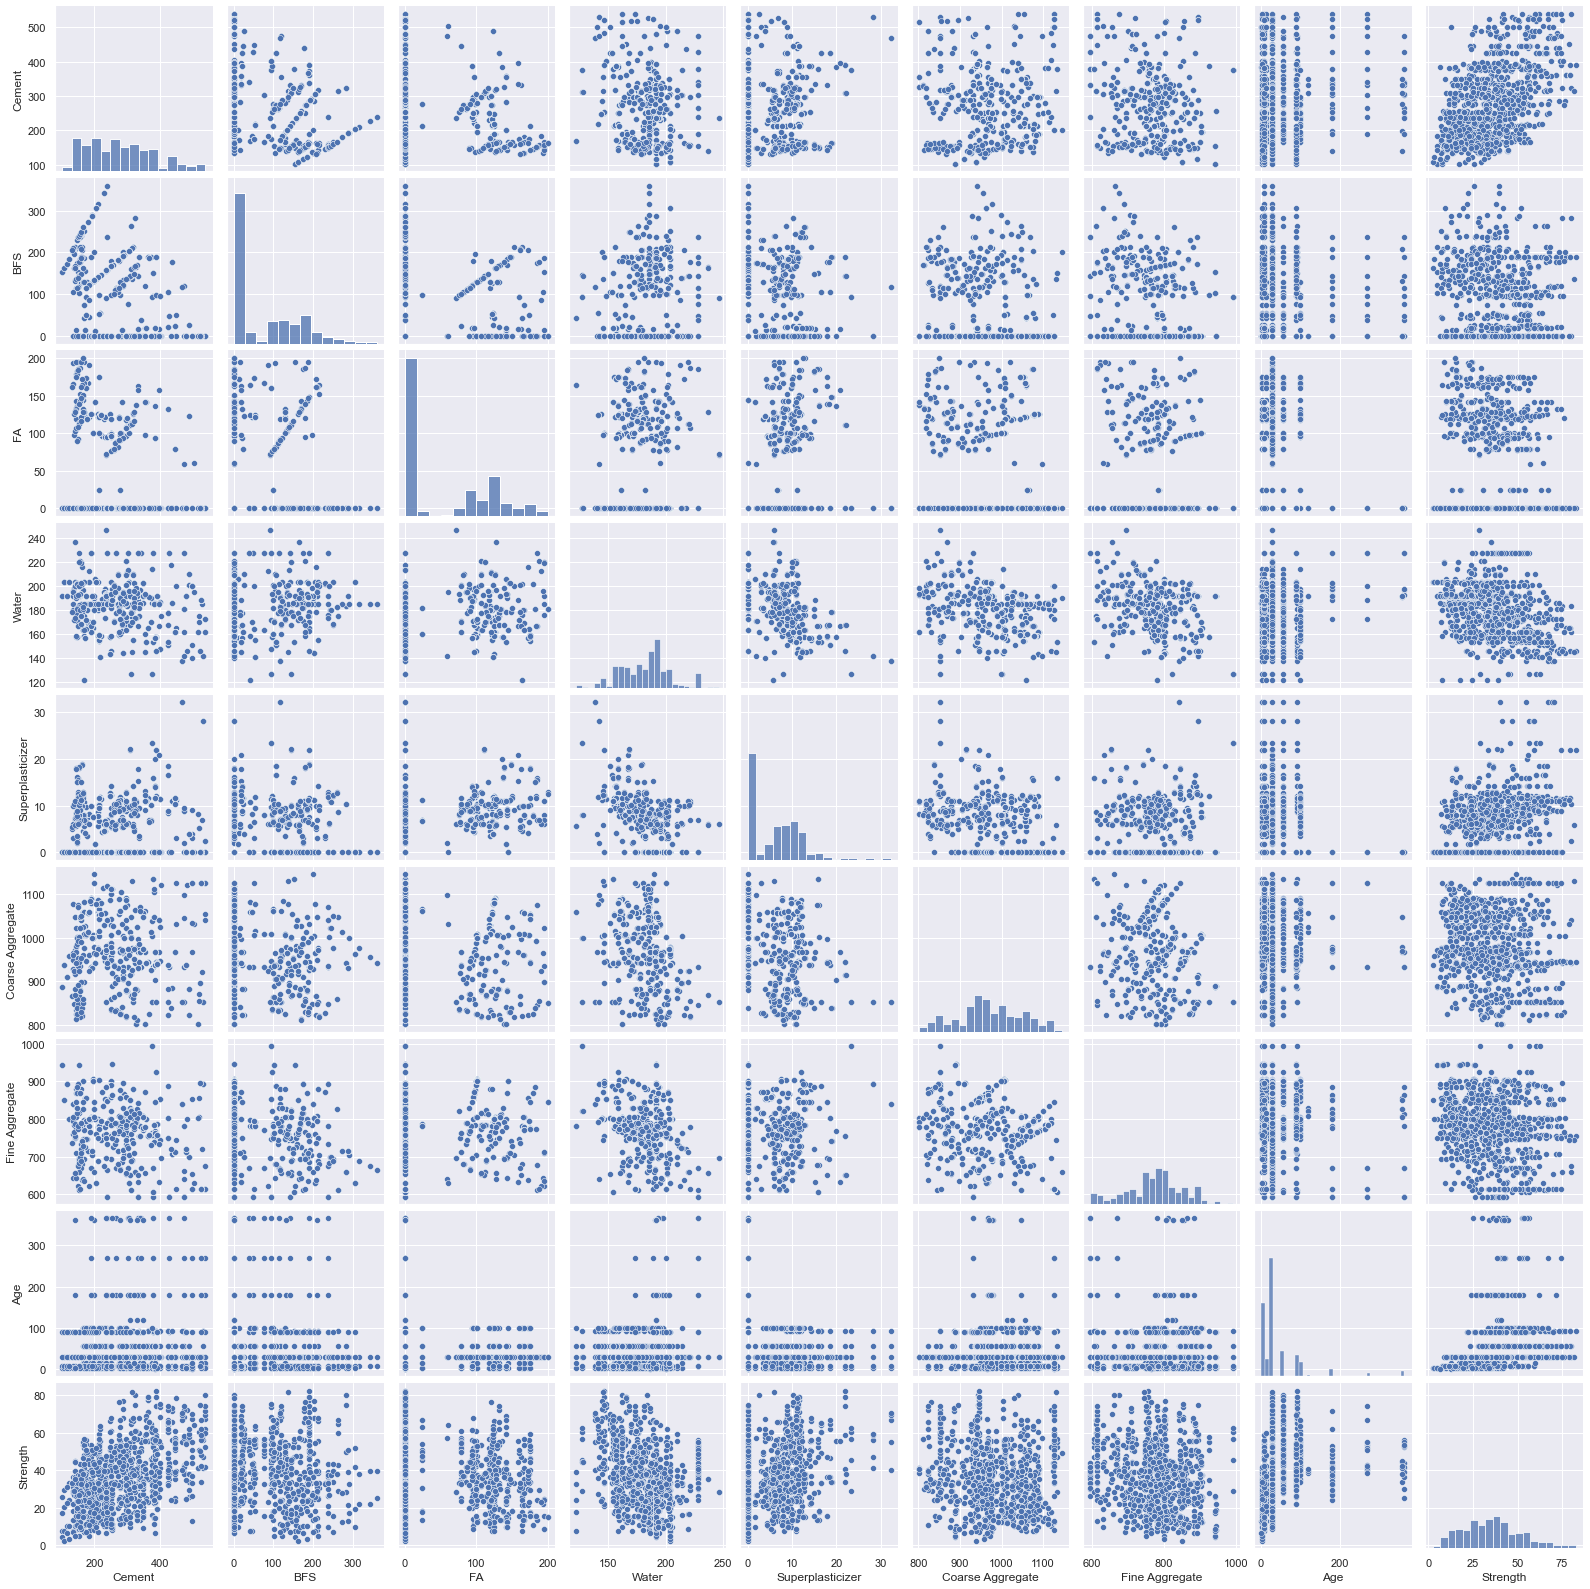

In [38]:
# Visualize the data using seaborn Pairplots to compare numeric features

ax= sns.pairplot(new_data)  #for all data--but if the data is so large, this is not feasible


# Notes: Do not run this on a big dataset. Filter the columns first

In [16]:
new_data.columns   #calling columns

Index(['Cement', 'BFS', 'FA', 'Water', 'Superplasticizer', 'Coarse Aggregate',
       'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

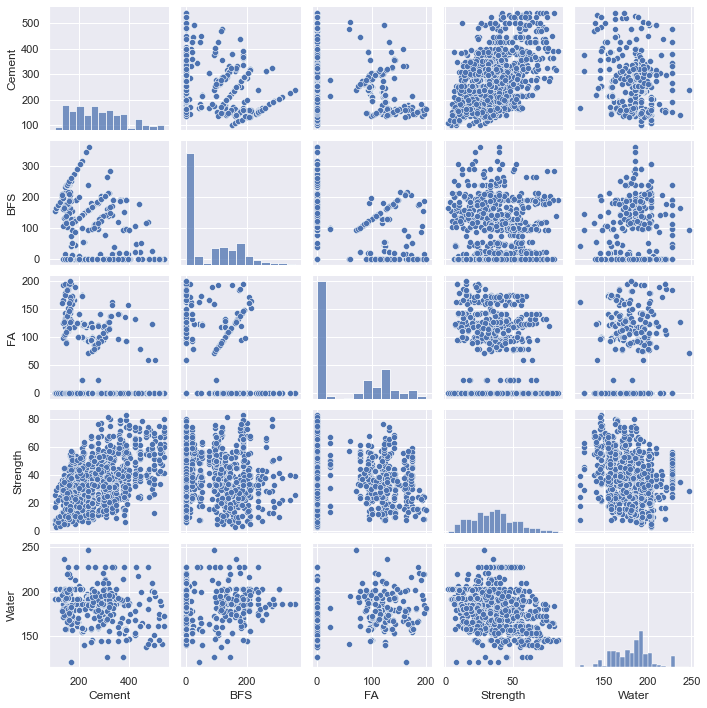

In [40]:
# Visualising a Subset of our data - important features only - those with correlation

#plt.figure (figsize=(200,15))  --does work here
ax= sns.pairplot(new_data[['Cement', 'BFS', 'FA', 'Strength', 'Water']], height= 2)


#that is slice pairplot to visualize only important data
# added hue(promo) to show the categories

# Outliers - dont run (just an example)

In [ ]:

# Box plot to visualize outliers
plt.figure(figsize=(10, 5))            #u see me using both matplotlib and seaborn
sns.boxplot(x=new_data['Column name'])
plt.title('Box Plot of column')
plt.show()

In [ ]:
# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = data['Column name'].quantile(0.25)
Q3 = data['Column name'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_cleaned = data[(data['Column name'] >= lower_bound) & (data['Column name'] <= upper_bound)]

print("\nDataFrame after removing outliers:")
print(data_cleaned)

In [64]:
new_data.columns

Index(['Cement', 'BFS', 'FA', 'Water', 'Superplasticizer', 'Coarse Aggregate',
       'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

# Separation of dependent and independent data

In [28]:

#There are different approaches-- holdout validation

X = new_data.drop(columns=['Coarse Aggregate','Fine Aggregate','Strength'], axis = 1)  # x-values
y=new_data.Strength


#or 

X = new_data.drop('Strength', axis =1)  # x-values (features)
y = new_data['Strength']  # target variable



# Scaling

# Standardization or normalization

In [29]:
#Standardization : mean = 0, STD= 1 of only the input features

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the input features
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for the scaled input features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the scaled input features with the target variable into a single DataFrame
final_data = pd.concat([X_scaled_df, y], axis=1)

# Display the combined DataFrame
final_data.head()

,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,79.986111
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,61.887366
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,40.269535
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,41.052780
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,44.296075


In [32]:
final_data.describe()

,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1030.000000
mean,4.335798e-17,-1.117607e-15,1.267056e-15,5.503688e-16,3.987102e-16,-9.011131e-17,-4.575358e-16,1.534910e-16,35.817836
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,16.705679
min,-1.715219e+00,-8.568863e-01,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01,2.331808
25%,-8.500258e-01,-8.568863e-01,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01,23.707115
50%,-7.912996e-02,-6.017760e-01,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01,34.442774
75%,6.589771e-01,8.007508e-01,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01,46.136287
max,2.477918e+00,3.310688e+00,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00,82.599225


In [33]:
#Normalization : 0 and 1

#Code for Min Max Scaler

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the input features
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for the scaled input features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the scaled input features with the target variable into a single DataFrame
final_data = pd.concat([X_scaled_df, y], axis=1)

# Display the combined DataFrame
final_data.head()


,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176,79.986111
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176,61.887366
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011,40.269535
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000,41.052780
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264,44.296075


In [34]:
final_data.describe()

,Cement,BFS,FA,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.409054,0.205608,0.270800,0.477576,0.192643,0.499763,0.450524,0.122698,35.817836
std,0.238601,0.240064,0.319822,0.170504,0.185512,0.226029,0.201143,0.173544,16.705679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.331808
25%,0.206336,0.000000,0.000000,0.344511,0.000000,0.380814,0.343578,0.016484,23.707115
50%,0.390183,0.061213,0.000000,0.504990,0.197205,0.485465,0.465404,0.074176,34.442774
75%,0.566210,0.397746,0.591054,0.560878,0.315528,0.663953,0.577020,0.151099,46.136287
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,82.599225


# Feature Selection (selection of subset to feed into our algorithm)

In [70]:
#2 ways to help us select the important features are:
#Correlation
#Feature Importance

# Feature Selection

In [71]:
#Methods

#1. Correlation feature importance

#2. Decisiontree regressor

#  Running Correlation

In [35]:
# 1 Running Correlation

new_raw_data=final_data[['Cement', 'BFS', 'FA','Water','Superplasticizer', 'Age', 'Strength']]



#this is the dataset we are going to feed into the correlation

In [36]:
# feeding into correlation

hm=new_raw_data[['Cement', 'BFS', 'FA','Water','Superplasticizer', 'Age', 'Strength']].corr()



Notes
.corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
0.8 +- is Strong Correlation, 0.6 to 0.8 +- is moderate Correlation & the other values, there is no correlation
More Info here: https://statisticsbyjim.com/basics/correlations/

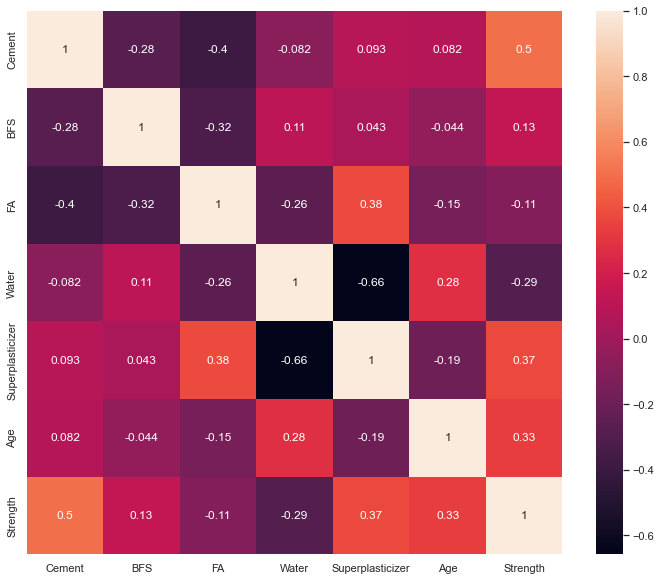

In [37]:
# Visualizing Correlation with a Heatmap

g= sns.heatmap(hm,annot=True)   #annot adds the values on the map

# Splitting the Raw Data 

In [ ]:
1 Hold-out validation : involves splitting the dataset into training the model and one for testing it.
    
#The performance metrics can vary depending on how the data is split
#which might not give a reliable estimate of the model’s performance on unseen data.

# fixing random state ensures consistency of split

2. Cross Validation
#involves splitting the dataset into multiple subsets or "folds" and systematically training and testing the model 
#on different folds to obtain a more robust estimate of model performance.

# K-fold - Decision Tree Example

In [39]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data
X = new_raw_data.drop('Strength', axis=1)  # Features
y = new_raw_data['Strength']  # Target

# Initialize K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_mse_list = []
train_rmse_list = []
train_mae_list = []
train_r2_list = []

test_mse_list = []
test_rmse_list = []
test_mae_list = []
test_r2_list = []

for train_index, val_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[val_index]
    y_train, y_test = y.iloc[train_index], y.iloc[val_index]
    
    # Initialize and train model
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)
    
    # Predict and evaluate training data
    y_train_pred = regressor.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    train_mse_list.append(train_mse)
    train_rmse_list.append(train_rmse)
    train_mae_list.append(train_mae)
    train_r2_list.append(train_r2)
    
    # Predict and evaluate validation data
    y_test_pred = regressor.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    test_mse_list.append(test_mse)
    test_rmse_list.append(test_rmse)
    test_mae_list.append(test_mae)
    test_r2_list.append(test_r2)

# Print average metrics across all folds
print("Average Training MSE:", np.mean(train_mse_list))
print("Average Training RMSE:", np.mean(train_rmse_list))
print("Average Training MAE:", np.mean(train_mae_list))
print("Average Training R²:", np.mean(train_r2_list))

print("Average Test MSE:", np.mean(test_mse_list))
print("Average Test RMSE:", np.mean(test_rmse_list))
print("Average Test MAE:", np.mean(test_mae_list))
print("Average Test R²:", np.mean(test_r2_list))


Average Training MSE: 0.9771635495297503
Average Training RMSE: 0.9737159178308683
Average Training MAE: 0.1120813125870106
Average Training R²: 0.9964912336997795
Average Test MSE: 44.46569521563068
Average Test RMSE: 6.593661708347993
Average Test MAE: 4.274595024042261
Average Test R²: 0.8416828621562426


# Holdout validation

In [45]:
#split our data and train it based on a subset

# there are cross-validation and hold-out validation

# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)




(721, 6)
(309, 6)
(721,)
(309,)


# Example with Decision Tree Machine Learning Algorithm

In [47]:
# Initialize and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Predict and evaluate the training data
y_train_pred = regressor.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Predict and evaluate the testing data (Hold-out set)
y_test_pred = regressor.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics for the training data
print("\nTraining Metrics:")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R²:", train_r2)

# Print metrics for the testing data
print("\nTesting Metrics (Hold-out):")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R²:", test_r2)


Training Metrics:
MSE: 1.1602177697672644
RMSE: 1.0771340537589853
MAE: 0.12944412130946645
R²: 0.9958852082795628

Testing Metrics (Hold-out):
MSE: 45.075327199274106
RMSE: 6.713816142796443
MAE: 4.347563435769204
R²: 0.833411030210325


Text(0.5, 1.0, 'Actuals vs Predicted Train Values')

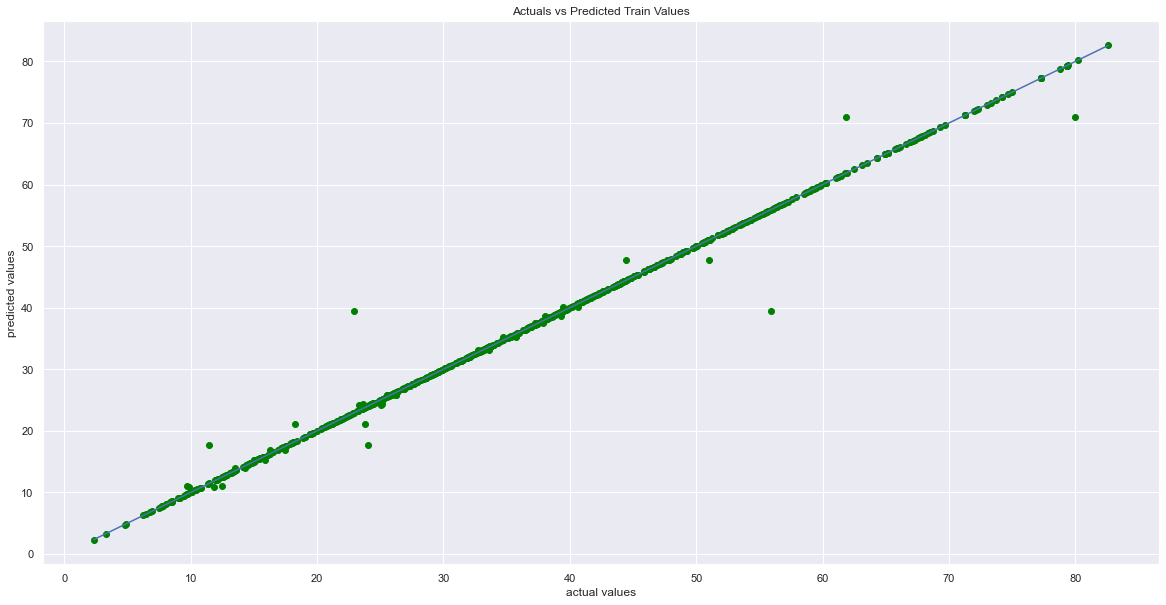

In [49]:


plt.figure(figsize=(20,10))

plt.scatter(y_train,y_train_predict, color='green') #plot the original test values on x-axis and predicted test values on y-axis
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()]) # this is not regression-just strain line
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Actuals vs Predicted Train Values')

Text(0.5, 1.0, 'Actuals vs Predicted Test Values')

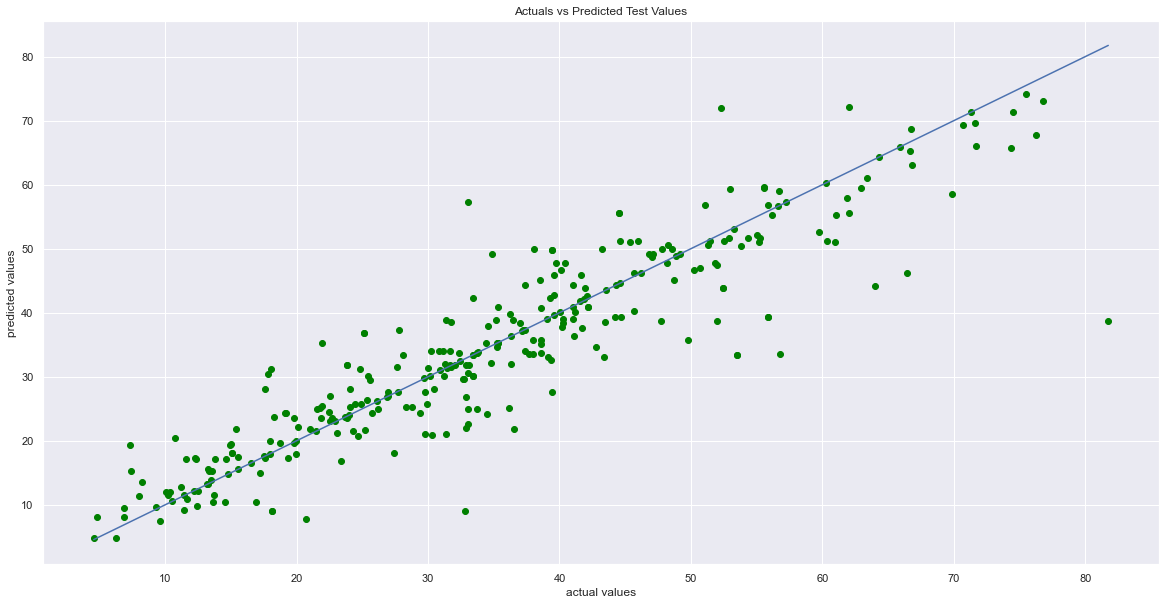

In [50]:


plt.figure(figsize=(20,10))

plt.scatter(y_test,y_test_predict, color='green') #plot the original test values on x-axis and predicted test values on y-axis
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()]) # this is not regression-just strain line
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Actuals vs Predicted Test Values')


# Hyperparamter tuning